<h1>Задание 1<h1>

Написать программу (Python, С# или любой другой язык программирования) для построения частотного словаря текста на русском языке без учета стоп-слов. Входной текст хранится в текстовом файле, построенный словарь также должен быть сохранен в текстовый файл в формате (словоформа, количество_вхождений_словоформы) с сортировкой по количеству вхождений. Для деления текста на токены и удаления стоп-слов использовать библиотеку nltk, а для нормализации использовать библиотеку Pymorphy2. (2 балл)

<h2>Импорт библиотек<h2>

In [325]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
#from pymystem3 import Mystem
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

#Create and stopwords list
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', '—', 'к', 'на', 'какой-то', 'который'])

#mystem = Mystem() 

In [326]:
punctuation = punctuation + '...' + '—' + '«' + '»' + '„' + '“' + '№'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~...—«»„“№'

<h2>Определение функций<h2>

In [328]:
def get_text(file_name):
    txt = ''
    with open(file_name) as f:
        for line in f:
            line = line.rstrip("\r\n")
            line = line.rstrip(".—")
            txt += line + ' '
    return(txt)

In [329]:
def get_sentences(text):
    split_regex = re.compile(r'[.|!|?|…]')
    sentences = filter(lambda t: t, [t.strip() for t in split_regex.split(text)])
    corpus = []
    for s in sentences:
        corpus.append(s)
    return(corpus)

In [331]:
#Preprocess function
def preprocess_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [ morph.parse(word.lower())[0].normal_form for word in tokens if (word != " ") and (word not in punctuation)]
    filtered_tokens = []
    for word in lemmatized_tokens:
        if (word not in russian_stopwords) and (word != " ") and (word not in punctuation):
            filtered_tokens.append(word)
    
    
    return filtered_tokens

<h2>Начало работы</h2>

In [332]:
txt = get_text('text.txt')
print(txt)
txt = get_sentences(txt)
txt = ' '.join(txt)

В середине августа, перед рождением молодого месяца, вдруг наступили отвратительные погоды, какие так свойственны северному побережью Черного моря. То по целым суткам тяжело лежал над землею и морем густой туман, и тогда огромная сирена на маяке ревела днем и ночью, точно бешеный бык. То с утра до утра шел не переставая мелкий, как водяная пыль, дождик, превращавший глинистые дороги и тропинки в сплошную густую грязь, в которой увязали надолго возы и экипажи. То задувал с северо-запада, со стороны степи свирепый ураган; от него верхушки деревьев раскачивались, пригибаясь и выпрямляясь, точно волны в бурю, гремели по ночам железные кровли дач, и казалось, будто кто-то бегает по ним в подкованных сапогах, вздрагивали оконные рамы, хлопали двери, и дико завывало в печных трубах. Несколько рыбачьих баркасов заблудилось в море, а два и совсем не вернулись: только спустя неделю повыбрасывало трупы рыбаков в разных местах берега Обитатели пригородного морского курорта — большей частью греки и

In [333]:
txt = preprocess_text(txt)

In [334]:
from nltk import FreqDist

In [335]:
frequency_distribution = FreqDist(txt)
print(frequency_distribution)

<FreqDist with 3530 samples and 8359 outcomes>


In [336]:
frequency_distribution

FreqDist({'вера': 95, 'сказать': 73, 'всё': 61, 'знать': 58, 'свой': 55, 'весь': 47, 'николаевич': 44, 'рука': 43, 'любовь': 43, 'говорить': 43, ...})

In [337]:
for key in frequency_distribution:
    print(key, frequency_distribution[key])

вера 95
сказать 73
всё 61
знать 58
свой 55
весь 47
николаевич 44
рука 43
любовь 43
говорить 43
мочь 39
очень 39
глаз 37
видеть 36
ещё 35
анна 35
большой 34
князь 34
человек 32
ваш 32
николай 30
письмо 30
наш 29
время 28
слово 28
жизнь 25
сестра 25
точно 24
княгиня 24
спросить 24
василий 24
львович 24
день 22
любить 22
хотеть 22
смерть 22
желтковый 22
муж 21
лицо 21
твой 21
дедушка 21
аносов 21
дом 20
самый 20
женщина 19
шеин 18
первый 18
год 18
каждый 18
прекрасный 17
хороший 17
сделать 17
браслет 17
дело 16
милый 16
делать 16
ребёнок 16
голова 16
генерал 16
должный 15
душа 15
казаться 14
больший 14
город 14
пойти 14
бог 14
верочка 14
море 13
место 13
сидеть 13
стол 13
маленький 13
нога 13
оба 13
думать 13
стать 13
увидеть 13
несколько 12
глядеть 12
просить 12
понимать 12
прийти 12
господин 12
целый 11
идти 11
дверь 11
держать 11
минута 11
друг 11
свет 11
писать 11
просто 11
бояться 11
показать 11
последний 11
смешной 11
остаться 11
конец 10
также 10
чувство 10
ходить 10
красота 10
хот

бас 2
упрёк 2
юг 2
совесть 2
честной 2
ревматизм 2
крестить 2
аня 2
шестьдесят 2
постоять-ка 2
понамаревый 2
предать 2
мирза-булат-тугановский 2
ежедневно 2
ложа 2
цирк 2
поход 2
сражение 2
победа 2
мороз 2
неторопливый 2
скучный 2
спать 2
немой 2
встречаться 2
чисто 2
возвышенный 2
образ 2
наивный 2
жалость 2
терпение 2
физический 2
пленный 2
личный 2
командир 2
расстрелять 2
почтительно 2
тень 2
вызов 2
начальник 2
переправа 2
дунай 2
ранить 2
осколок 2
жестокий 2
скобелев 2
относиться 2
переход 2
оружие 2
прямой 2
непременно 2
раздаваться 2
решительный 2
уютный 2
анекдот 2
платить 2
случаться 2
комендантский 2
тосковать 2
находить 2
отпуск 2
женатый 2
посылать 2
гореть 2
основа 2
являться 2
бежать 2
бурный 2
объяснение 2
удаться 2
свадьба 2
критический 2
лжесвидетель 2
требовать 2
определённый 2
известный 2
вопрос 2
принудить 2
почтенный 2
целомудренный 2
родительский 2
законный 2
кожа 2
жидкий 2
череп 2
зуб 2
супружество 2
неловко 2
оказаться 2
нехорошо 2
собираться 2
продолжение 2

одержать 1
смолоду 1
спокойно 1
брезговать 1
вступить 1
встретить 1
площадь 1
пушечный 1
пальба 1
пострадать 1
поставить 1
приидти 1
стоящий 1
низенький 1
размер 1
прозрачный 1
плавать 1
рыбка 1
примосточка 1
удивить 1
осмотреть 1
дно 1
широко 1
вдавить 1
свободно 1
влетать 1
туда 1
сие 1
сознаться 1
недогадливый 1
прехорошенький 1
предъявить 1
квитанция 1
канонада 1
несообразительный 1
встретиться 1
пробежать 1
искра 1
подобный 1
почувствовать 1
влюбиться 1
пламенно 1
бесповоротно 1
потянуть 1
всюду 1
прибавление 1
обходиться 1
скрипка 1
нарядиться 1
танцевать 1
обыкновение 1
повестись 1
освещение 1
сенцы 1
скрыться 1
притворяться 1
перебирать 1
лепесток 1
тамошний 1
собирать 1
мешок 1
прижать 1
луна 1
спешить 1
денной 1
последовать 1
клятва 1
взаимный 1
проститься 1
навсегда 1
разочарованно 1
бивуачный 1
армейский 1
иной 1
суметь 1
замяться 1
некогда 1
молодость 1
кутёж 1
юность 1
здоровье 1
оглянуться 1
развалина 1
пойти-ка 1
поди 1
ящичек 1
притерпеться 1
ощупью 1
сохранить 1
зорко

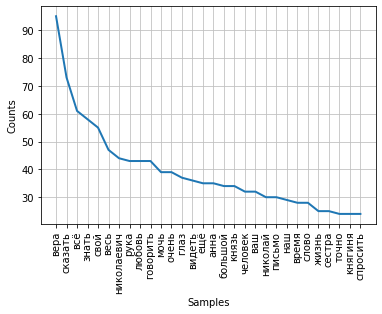

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [338]:
frequency_distribution.plot(30, cumulative=False)

In [339]:
#!pip3 install wordcloud

In [340]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [341]:
%matplotlib inline

In [342]:
text_raw = " ".join(t)

In [343]:
word_cloud = WordCloud().generate(text_raw)

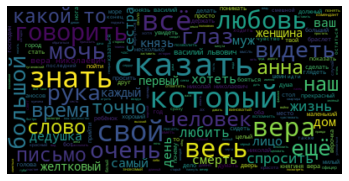

In [344]:
wordcloud = WordCloud(max_font_size=40).generate(text_raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h2>Запись в файл</h2>

In [345]:
with open('result1.txt','w') as f:
    for key in frequency_distribution:
        f.write(key+' : '+str(frequency_distribution[key])+ '\n')
f.close()